In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torchvision import transforms
from torchvision import datasets
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np

# Thiết lập thiết bị (MPS cho GPU Apple hoặc CPU)
device = "mps" if torch.backends.mps.is_available() else "cpu"
torch_dtype = torch.float16 if torch.backends.mps.is_available() else torch.float32

# In ra thiết bị đang sử dụng
print(f'Sử dụng thiết bị: {device}')

# Tải EMNIST ByClass dataset (để cải thiện độ chính xác)
train_dataset = datasets.EMNIST(root='./data', split='byclass', train=True, download=False, transform=transforms.ToTensor())
test_dataset = datasets.EMNIST(root='./data', split='byclass', train=False, download=False, transform=transforms.ToTensor())

# Chuẩn hóa dữ liệu
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Chuyển đổi dữ liệu thành DataLoader để huấn luyện
train_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False)

# Xây dựng mô hình CNN bằng PyTorch
class CNN(nn.Module):
    def __init__(self, num_classes=62):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 256 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Khởi tạo mô hình
num_classes = len(np.unique(train_dataset.targets))
model = CNN(num_classes).to(device)

# Định nghĩa loss và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Huấn luyện mô hình
num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Đặt lại gradient về 0
        optimizer.zero_grad()

        # Forward và backward
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Đánh giá mô hình
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test accuracy: {100 * correct / total:.2f}%')

# Lưu mô hình
torch.save(model.state_dict(), 'emnist_cnn_model.pth')

Sử dụng thiết bị: mps
Epoch [1/25], Loss: 0.4785
Epoch [2/25], Loss: 0.3598
Epoch [3/25], Loss: 0.3353
Epoch [4/25], Loss: 0.3181
Epoch [5/25], Loss: 0.3034
Epoch [6/25], Loss: 0.2890
Epoch [7/25], Loss: 0.2756
Epoch [8/25], Loss: 0.2627
Epoch [9/25], Loss: 0.2499
Epoch [10/25], Loss: 0.2371
Epoch [11/25], Loss: 0.2248
Epoch [12/25], Loss: 0.2133
Epoch [13/25], Loss: 0.2020
Epoch [14/25], Loss: 0.1916
Epoch [15/25], Loss: 0.1823
Epoch [16/25], Loss: 0.1731
Epoch [17/25], Loss: 0.1653
Epoch [18/25], Loss: 0.1573
Epoch [19/25], Loss: 0.1509
Epoch [20/25], Loss: 0.1445
Epoch [21/25], Loss: 0.1387
Epoch [22/25], Loss: 0.1338
Epoch [23/25], Loss: 0.1285
Epoch [24/25], Loss: 0.1243
Epoch [25/25], Loss: 0.1201
Test accuracy: 85.19%


2024-11-03 23:34:02.500 python[11656:366454] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-03 23:34:02.500 python[11656:366454] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Predicted Label: 58, Confidence: 99.27%
Predicted Label: 23, Confidence: 100.00%
Predicted Label: 24, Confidence: 99.34%
Predicted Label: 61, Confidence: 97.87%


In [7]:
# In ra một số dữ liệu từ tập dữ liệu
import matplotlib.pyplot as plt


PicklingError: Can't pickle <function <lambda> at 0x32dd46670>: attribute lookup <lambda> on __main__ failed

Kích thước ảnh: (28, 28)


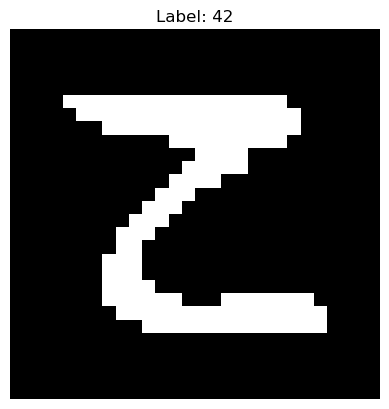

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

# Tải EMNIST Balanced dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x > 0.5).float()),  # Chuyển ảnh thành ảnh nhị phân
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.EMNIST(root='./data', split='balanced', train=True, download=False, transform=transform)

# Lấy một mẫu hình ảnh và nhãn từ dataset
print(f'Kích thước ảnh: {image.shape}')
image, label = train_dataset[20]

# Chuyển đổi tensor thành định dạng phù hợp để hiển thị
image = image.squeeze().numpy()

# In ra hình ảnh và nhãn
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()
